# Eigenfaces a

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
face_id = mat_content['l']

print(face_data)
print(face_data.shape)

print(face_id)
print(face_id.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

In [3]:
# Split data set
# Train_id is the index of each train data in the total data set, test_id the same

from sklearn.model_selection import train_test_split

indices = np.arange(len(face_id[0]))
train_data, test_data, train_id, test_id = train_test_split(face_data, indices, test_size = 0.1)
train_data = train_data.T
test_data = test_data.T

print(train_data)
print(train_data.shape)
print(test_data)
print(test_data.shape)

ValueError: Found input variables with inconsistent numbers of samples: [2576, 520]

In [357]:
# Count the number of face images for each person 
# in the train and test set after randomly split

train_label = face_id[0,train_id]
unique_train, counts_train = np.unique(train_label, return_counts=True)
dict(zip(unique_train, counts_train))

#test_label = face_id[0,test_id]
#unique_test, counts_test = np.unique(test_label, return_counts=True)
#dict(zip(unique_test, counts_test))


{1: 81, 2: 93, 3: 96, 4: 84, 5: 87, 6: 27}

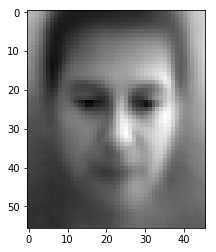

In [113]:
# Compute average face vector

num_train = len(train_data[0])

avg_face = (train_data.mean(axis=1)) / num_train

plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')

In [114]:
# Compute covariance matrix without low-dimensional compution

num_pix = len(train_data)

A = train_data - avg_face.reshape(num_pix,1)
S = (A.dot(A.T)) / num_train

In [115]:
# Compute the egenvalues
# Due to numerical error, some eigenvalues are complex but they have
# negligible imaginary parts. Morover real symetric covariance 
# matrix always has real eigenvalues and eigenvectors.

eigvals, eigvecs = np.linalg.eig(S)
eigvals = eigvals.real
eigvecs = eigvecs.real

In [116]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals.shape)
print(eigvecs.shape)

nonzero_eigvals = eigvals[abs(eigvals) >= 1e-7]
print(nonzero_eigvals.shape)

eigvecs_nonzero_eigvals = eigvecs[:,abs(eigvals) >= 1e-7]
print(eigvecs_nonzero_eigvals.shape)

(2576,)
(2576, 2576)
(468,)
(2576, 468)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
(2576, 30)


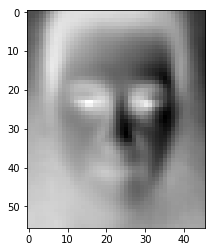

In [166]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces

M = 30 # Number of eigenvectors with M largest eigenvalues to be used

sorted_index = np.argsort(-nonzero_eigvals)[:M]
print(sorted_index)

eigfaces = eigvecs_nonzero_eigvals[:,sorted_index]
print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# Eigenfaces b

In [118]:
# Compute covariance matrix with low-dimensional compution

S_low_dim = ((A.T).dot(A)) / num_train

print(S.shape)
print(S_low_dim.shape)

(2576, 2576)
(468, 468)


In [119]:
# Compute the egenvalues 

eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
eigvals_low_dim = eigvals_low_dim.real
eigvecs_low_dim = eigvecs_low_dim.real

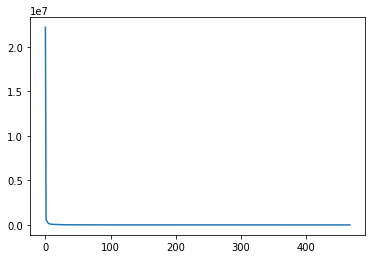

In [142]:
plt.plot(eigvals_low_dim)

In [143]:
eigvals_low_dim

array([2.22108841e+07, 5.54238696e+05, 4.83827676e+05, 2.77752146e+05,
       2.37352686e+05, 1.61789439e+05, 1.29671558e+05, 1.12381301e+05,
       1.01102784e+05, 8.49002360e+04, 6.65046565e+04, 6.33679205e+04,
       5.35110308e+04, 5.18055206e+04, 4.85202553e+04, 4.29114805e+04,
       3.62137264e+04, 3.53655820e+04, 3.34383039e+04, 3.27882771e+04,
       3.05743278e+04, 2.62828044e+04, 2.53756301e+04, 2.43802898e+04,
       2.25223210e+04, 2.29036745e+04, 2.20292105e+04, 2.00640111e+04,
       1.84085072e+04, 1.76495479e+04, 1.72661040e+04, 1.65561200e+04,
       1.60578773e+04, 1.47779396e+04, 1.49327499e+04, 1.42637560e+04,
       1.36365570e+04, 1.30512254e+04, 1.26189338e+04, 1.24063426e+04,
       1.22037964e+04, 1.16506658e+04, 1.08898040e+04, 1.06837913e+04,
       1.02000509e+04, 1.01080249e+04, 9.96260194e+03, 9.73759349e+03,
       9.52638975e+03, 9.27265349e+03, 8.85163543e+03, 8.79178260e+03,
       8.48689363e+03, 8.09081877e+03, 8.04572271e+03, 7.73739207e+03,
      

In [144]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals_low_dim.shape)
print(eigvecs_low_dim.shape)

nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e+3]
print(nonzero_eigvals_low_dim.shape)

eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e+3]
print(eigvecs_nonzero_eigvals_low_dim.shape)

(468,)
(468, 468)
(204,)
(468, 204)


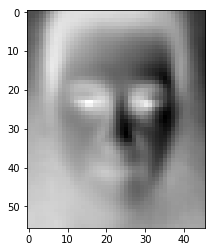

In [150]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces and 
# convert them to the eigenvectors of S and normalize them

eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M]])

eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T

#print(eigfaces_low_dim[:,0])
#print(eigfaces[:,0])
#print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces_low_dim[:,0],(46,56)).T, cmap = 'gist_gray')

# Application of Eigenfaces a (reconstruction)

In [151]:
# Project faces onto eigenfaces

W = (A.T).dot(eigfaces_low_dim) 
# the ith row of w represents the projection of the ith image
# the number of columns is the number of eigenfaces
# the number of rows is number of training data

print(W)

[[-4636.61039732   139.78999636 -1797.94430761 ...   -89.76663802
     63.59935914   141.64816952]
 [-4405.57073834   953.60273339 -1465.64901964 ...    25.08700994
     21.41689499   169.45791573]
 [-2783.83746482  -343.15347124  -758.99532932 ...    17.06310292
   -155.02226533   -88.34416467]
 ...
 [-4436.1226043    540.3215766    286.85180449 ...  -175.0576987
    -81.91272918   204.52052207]
 [-5296.56966631  -965.37220857   132.10906576 ...  -142.85148795
    -97.66748255   -98.83089017]
 [-5826.4624266  -1127.84126417   299.45012207 ...  -105.67031947
   -162.38880968  -136.02555088]]


892.7607042610833


(Text(0.5,1,'Reconstructed'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

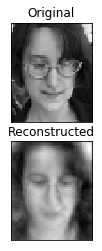

In [152]:
# Face image reconstruction

reconstructed_train_data = avg_face.reshape(num_pix,1) + eigfaces_low_dim.dot(W.T)

error_train = np.linalg.norm((train_data - reconstructed_train_data),axis=0)
print(np.average(error_train))

plt.subplot(211),plt.imshow(np.reshape(train_data[:,0],(46,56)).T, cmap = 'gist_gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(np.reshape(reconstructed_train_data[:,0],(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])

# Application of Eigenfaces b (NN classification)

In [149]:
W.shape

(468, 30)

In [366]:


#start = time.time()

A_test = test_data - avg_face.reshape(num_pix,1)
W_test = (A_test.T).dot(eigfaces_low_dim)

test_results = []
for row in W_test:
    index = np.argmin(np.linalg.norm(row - W, axis=1))
    test_results.append(face_id[index])
    
#true_results = [[test_id]

time_taken = time.time() - start
print(time_taken)
print(true_results)
print(test_results)

NameError: name 'avg_face' is not defined

In [365]:
A_test

NameError: name 'A_test' is not defined

In [ ]:
eigen

In [364]:
eigfaces_low_dim

NameError: name 'eigfaces_low_dim' is not defined

In [170]:
train_id[index]

array([17], dtype=uint8)

0.9615384615384616
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


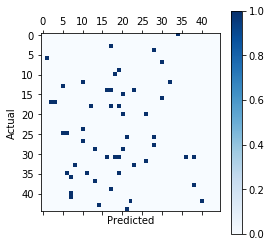

In [171]:
results_error = test_results - true_results

success_rate = np.count_nonzero(results_error == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

(Text(0.5,1,'Reconstructed'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

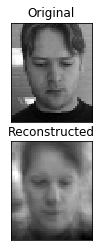

In [155]:
reconstructed_test_data = avg_face.reshape(num_pix,1) + eigfaces_low_dim.dot(W_test.T)

plt.subplot(211),plt.imshow(np.reshape(test_data[:,1],(46,56)).T, cmap = 'gist_gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(np.reshape(reconstructed_test_data[:,1],(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])

In [19]:
import time
start = time.time()

# Application of Eigenfaces b (Alternative method learnt)

In [1]:


M_AM = 1

def eigspace_generator(data):
    num_train = len(data[0])
    avg_face = (data.mean(axis=1)) / num_train
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e+3]
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e+3]
    
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_AM]]) 
    # Choose all the eigenvectors as eigenfaces in low_dim this case, since the maximum number of eigenfaces would
    # not exceed 10
    
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    list_eig_space.append(eigfaces_low_dim)
    
    list_avg_face.append(avg_face)

    
num_people = max(train_label)
eig_space = np.zeros((num_people,num_pix,M_AM))
sorted_train_data = train_data[:,np.argsort(train_label)]

list_eig_space = [] # Each element of list_eig_space contains the eigenspace of the i+1th person
list_avg_face = [] # Each element of list_avg_face contains the average face of the i+1th person
list_projection = [] # Each element of list_projection contains the projection of the jth test data to different eigenspaces
test_results_AM = []

# Generate all eigenspaces
column = 0
for i in range(num_people):
    num_faces = train_label.tolist().count(i+1)
    eigspace_generator(sorted_train_data[:,column : column + num_faces])
    column += num_faces

    
# Project each test data onto each eigenspace
for j in range(len(test_data[0])): 
    error = [];
    for i in range(num_people): 
        w = (test_data[:,j].T).dot(list_eig_space[i]) # row vector containing projection
        reconstructed_data = np.asarray(list_avg_face[i]).reshape(num_pix,1) + list_eig_space[i].dot(w.T) 
        error.append(np.linalg.norm(test_data[:,j] - reconstructed_data))
    test_results_AM.append(np.argmin(error) + 1)
    print (test_results_AM)


NameError: name 'train_label' is not defined

In [162]:
num_people

array([6], dtype=uint8)

In [21]:
end = time.time()
print(end - start)

90.02777290344238


0.4423076923076923
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


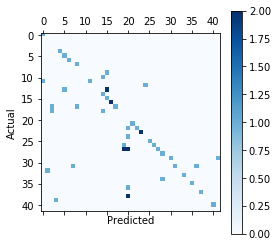

In [167]:
results_error_AM = test_results_AM - true_results

success_rate_AM = np.count_nonzero(results_error_AM == 0) / len(true_results)
print(success_rate_AM)

cm_AM = confusion_matrix(true_results, test_results_AM)

print(cm_AM)
plt.matshow(cm_AM, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [78]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())


 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]][-1]
        true_name = target_names[y_test[i]][-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

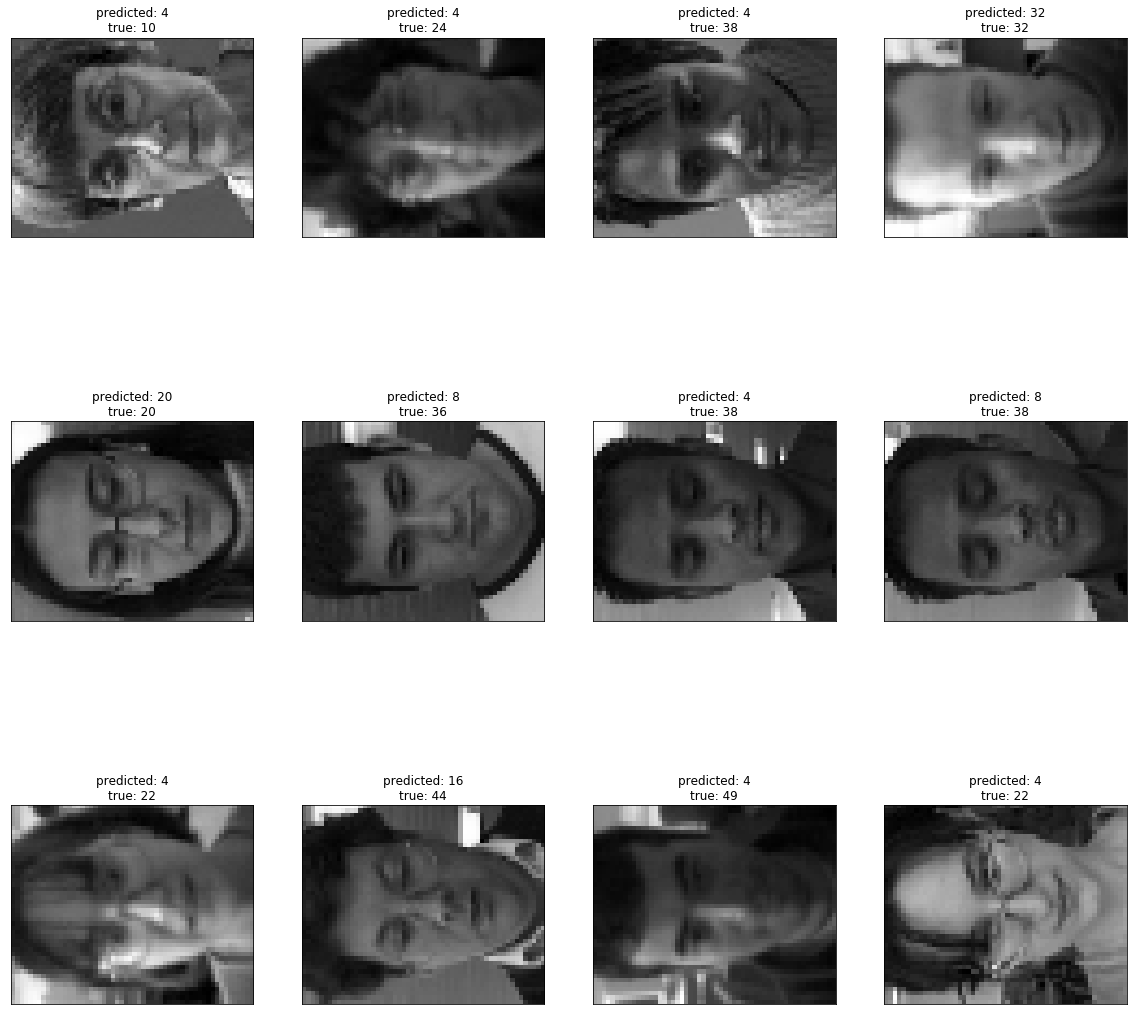

In [172]:
prediction_titles = list(titles(y_pred, y_test, face_l))
plot_gallery(X_test, prediction_titles, 46, 56)


In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# import some data to play with
mat_content = sio.loadmat('face.mat')

face_x = mat_content['X'].T
face_l = mat_content['l'].T

X_train, X_test, y_train, y_test = train_test_split(face_x, face_l, test_size=0.2)


Automatically created module for IPython interactive environment
At 1 Eigenvalues: 0.019230769230769232% Algo = uniform
133.82421875 MB
0.22065186500549316 s
0.019230769230769232 %
At 2 Eigenvalues: 0.0673076923076923% Algo = uniform
143.2265625 MB
0.027708768844604492 s
0.0673076923076923 %
At 3 Eigenvalues: 0.125% Algo = uniform
153.7109375 MB
0.03681802749633789 s
0.125 %
At 4 Eigenvalues: 0.23076923076923078% Algo = uniform
154.52734375 MB
0.043550968170166016 s
0.23076923076923078 %
At 5 Eigenvalues: 0.3173076923076923% Algo = uniform
155.2890625 MB
0.04251503944396973 s
0.3173076923076923 %
At 6 Eigenvalues: 0.27884615384615385% Algo = uniform
163.4453125 MB
0.031093120574951172 s
0.27884615384615385 %
At 7 Eigenvalues: 0.2692307692307692% Algo = uniform
171.8984375 MB
0.03419804573059082 s
0.2692307692307692 %
At 8 Eigenvalues: 0.2692307692307692% Algo = uniform
180.69140625 MB
0.049378156661987305 s
0.2692307692307692 %
At 9 Eigenvalues: 0.3076923076923077% Algo = uniform
180.9

At 74 Eigenvalues: 0.47115384615384615% Algo = uniform
268.34765625 MB
0.06571102142333984 s
0.47115384615384615 %
At 75 Eigenvalues: 0.46153846153846156% Algo = uniform
268.78515625 MB
0.06688594818115234 s
0.46153846153846156 %
At 76 Eigenvalues: 0.47115384615384615% Algo = uniform
268.90625 MB
0.04917716979980469 s
0.47115384615384615 %
At 77 Eigenvalues: 0.46153846153846156% Algo = uniform
269.05859375 MB
0.047394752502441406 s
0.46153846153846156 %
At 78 Eigenvalues: 0.46153846153846156% Algo = uniform
269.1875 MB
0.04288196563720703 s
0.46153846153846156 %
At 79 Eigenvalues: 0.5192307692307693% Algo = uniform
269.296875 MB
0.046987056732177734 s
0.5192307692307693 %
At 80 Eigenvalues: 0.4807692307692308% Algo = uniform
268.1953125 MB
0.0455937385559082 s
0.4807692307692308 %
At 81 Eigenvalues: 0.5096153846153846% Algo = uniform
269.80859375 MB
0.044989824295043945 s
0.5096153846153846 %
At 82 Eigenvalues: 0.49038461538461536% Algo = uniform
268.47265625 MB
0.04512810707092285 s
0

At 147 Eigenvalues: 0.38461538461538464% Algo = uniform
286.44140625 MB
0.08206605911254883 s
0.38461538461538464 %
At 148 Eigenvalues: 0.38461538461538464% Algo = uniform
287.23046875 MB
0.07240605354309082 s
0.38461538461538464 %
At 149 Eigenvalues: 0.41346153846153844% Algo = uniform
286.86328125 MB
0.07642698287963867 s
0.41346153846153844 %
At 150 Eigenvalues: 0.38461538461538464% Algo = uniform
287.48828125 MB
0.0828089714050293 s
0.38461538461538464 %
At 151 Eigenvalues: 0.3557692307692308% Algo = uniform
287.1015625 MB
0.0746297836303711 s
0.3557692307692308 %
At 152 Eigenvalues: 0.375% Algo = uniform
287.23828125 MB
0.07681989669799805 s
0.375 %
At 153 Eigenvalues: 0.3557692307692308% Algo = uniform
287.89453125 MB
0.08397698402404785 s
0.3557692307692308 %
At 154 Eigenvalues: 0.375% Algo = uniform
288.01171875 MB
0.07966995239257812 s
0.375 %
At 155 Eigenvalues: 0.36538461538461536% Algo = uniform
288.140625 MB
0.07645010948181152 s
0.36538461538461536 %
At 156 Eigenvalues: 0

288.83203125 MB
0.11429524421691895 s
0.2980769230769231 %
At 221 Eigenvalues: 0.27884615384615385% Algo = uniform
288.921875 MB
0.11741304397583008 s
0.27884615384615385 %
At 222 Eigenvalues: 0.3076923076923077% Algo = uniform
289.00390625 MB
0.11569809913635254 s
0.3076923076923077 %
At 223 Eigenvalues: 0.2980769230769231% Algo = uniform
289.41015625 MB
0.11597490310668945 s
0.2980769230769231 %
At 224 Eigenvalues: 0.28846153846153844% Algo = uniform
289.5 MB
0.11651182174682617 s
0.28846153846153844 %
At 225 Eigenvalues: 0.3076923076923077% Algo = uniform
289.56640625 MB
0.11778926849365234 s
0.3076923076923077 %
At 226 Eigenvalues: 0.27884615384615385% Algo = uniform
289.6875 MB
0.11841511726379395 s
0.27884615384615385 %
At 227 Eigenvalues: 0.27884615384615385% Algo = uniform
289.7890625 MB
0.11606693267822266 s
0.27884615384615385 %
At 228 Eigenvalues: 0.28846153846153844% Algo = uniform
293.765625 MB
0.12185811996459961 s
0.28846153846153844 %
At 229 Eigenvalues: 0.2980769230769

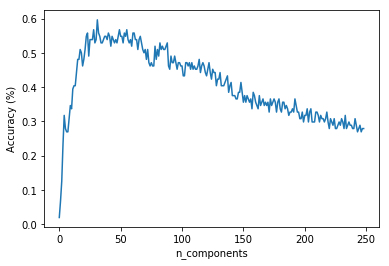

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from memory_profiler import memory_usage
import time

n_neighbors = 1

#X_train, X_test, y_train, y_test = train_data.T, test_data.T, train_id.T, test_id.T

accuracies = []
times = []
mems = []

for n_components in range(1,250):
    #for weights in ['uniform', 'distance']:
    for weights in ['uniform']:
        # we create an instance of Neighbours Classifier and fit the data.

        start_time = time.time()
        pca = PCA(n_components=n_components, whiten=True).fit(X_train)

        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)

        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf = clf.fit(X_train_pca, y_train.ravel())


        y_pred = clf.predict(X_test_pca)
        
        
        results_error = y_pred - y_test.ravel()
        success_rate = np.count_nonzero(results_error == 0) / len(y_test)
        
        end_time = time.time()
        run_time = end_time - start_time
        times.append(run_time)
        
        accuracies.append(success_rate)
        
        print('At '+str(n_components)+' Eigenvalues: ' + str(success_rate) +'% ' + 'Algo = ' + str(weights))
        
        #print(classification_report(y_test, y_pred))

        #cm_AM = confusion_matrix(y_test, y_pred)

        #print(cm_AM)
        #plt.matshow(cm_AM, cmap = 'Blues')
        #plt.colorbar()
        #plt.ylabel('Actual')
        #plt.xlabel('Predicted')
        #plt.show()

        mem_usage = memory_usage(-1, max_usage = True)
        mems.append(mem_usage)
        
        print(str(mem_usage) + ' MB')
        print(str(run_time) + ' s')
        print(str(success_rate) + ' %')
        
plt.plot(accuracies)
plt.ylabel('Accuracy (%)')
plt.xlabel('n_components')
plt.show()

In [97]:
results_error

array([ -59, -197, -337,   -1,   -1, -277, -345, -298, -177, -281, -451,
       -181, -270,   -6, -302,  -51,  -17, -168, -417,    1, -185,   -3,
        -17,  -94, -195, -312, -465,    2, -119,   -3, -382,    1, -379,
         -1, -143, -375,   -1, -243, -129,    1, -172, -259, -191,   68,
       -157, -262,   26,   -1,   -1,    1, -106, -220])

In [99]:
y_test

array([ 91, 232, 371, 312, 199, 356, 379, 377, 212, 437, 484, 217, 413,
       209, 381,  83, 176, 372, 496, 152, 218, 207, 306, 126, 230, 347,
       500, 357, 322, 399, 415, 150, 414, 309, 179, 454,  69, 447, 163,
        58, 376, 295, 478,  11, 189, 465, 177, 487, 391, 310, 138, 424])

In [101]:
y_pred

array([ 32,  35,  34, 311, 198,  79,  34,  79,  35, 156,  33,  36, 143,
       203,  79,  32, 159, 204,  79, 153,  33, 204, 289,  32,  35,  35,
        35, 359, 203, 396,  33, 151,  35, 308,  36,  79,  68, 204,  34,
        59, 204,  36, 287,  79,  32, 203, 203, 486, 390, 311,  32, 204])

In [88]:
X_test.shape

(2576, 52)

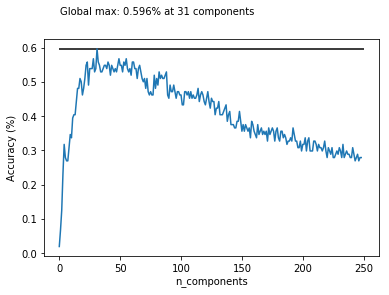

In [4]:
plt.plot(accuracies)
plt.yticks(np.arange(0,1, step = 0.1))
plt.ylabel('Accuracy (%)')
plt.xlabel('n_components')

ymax = max(accuracies)
xposbest = accuracies.index(ymax)
xmax = accuracies[xposbest]
plt.hlines(ymax, 0, 250)

plt.annotate('Global max: ' +str(round(ymax,3)) + '% at ' + str(xposbest) + ' components', xy=(xmax, ymax), xytext=(xmax, ymax + 0.1),)
plt.show()

In [14]:
times_ms[xposbest]

40.34996032714844

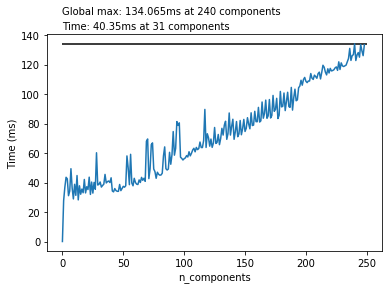

In [16]:
times_ms = []
for itime in times:
    times_ms.append(itime * 1000) 

plt.plot(times_ms)
plt.yticks(np.arange(0,220, step = 20))
plt.ylabel('Time (ms)')
plt.xlabel('n_components')

ymax = max(times_ms)
xpos = times_ms.index(ymax)
xmax = times_ms[xpos]


plt.hlines(ymax, 0, 250)
plt.annotate('Global max: ' +str(round(ymax,3)) + 'ms at ' + str(xpos) + ' components', xy=(xmax, ymax), xytext=(0, ymax+20))
plt.annotate('Time: ' +str(round(times_ms[xposbest],3)) + 'ms at ' + str(xposbest) + ' components', xy=(xmax, ymax), xytext=(0, ymax+10))
plt.show()

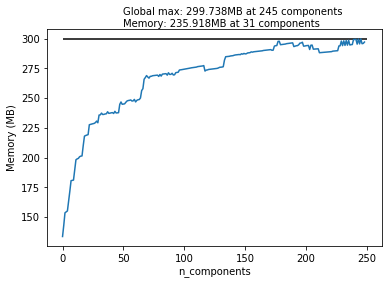

In [17]:
plt.plot(mems)
#plt.yticks(np.arange(250,350, step = 20))
plt.ylabel('Memory (MB)')
plt.xlabel('n_components')

ymax = max(mems)
xpos = mems.index(ymax)
xmax = mems[xpos]

plt.hlines(ymax, 0, 250)
plt.annotate('Global max: ' +str(round(ymax,3)) + 'MB at ' + str(xpos) + ' components', xy=(0,270), xytext=(xmax-250,ymax+20))
plt.annotate('Memory: ' +str(round(mems[xposbest],3)) + 'MB at ' + str(xposbest) + ' components', xy=(0,270), xytext=(xmax-250,ymax+10))
plt.show()

In [31]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())


 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]][-1]
        true_name = target_names[y_test[i]][-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

At 31 Eigenvalues: 0.5673076923076923% Algo = uniform
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       0.00      0.00      0.00         1
          3       1.00      1.00      1.00         1
          4       0.67      1.00      0.80         4
          5       0.50      1.00      0.67         1
          6       1.00      0.67      0.80         3
          7       1.00      1.00      1.00         3
          8       0.50      0.50      0.50         4
          9       0.67      0.40      0.50         5
         10       1.00      0.50      0.67         2
         11       0.50      0.25      0.33         4
         12       0.00      0.00      0.00         2
         13       1.00      1.00      1.00         1
         14       0.50      1.00      0.67         2
         15       0.50      1.00      0.67         1
         16       0.00      0.00      0.00         0
         18       0.00      0.00      0.00  

/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikhaildemtchenko/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


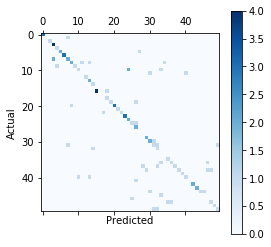

297.046875 MB
0.048338890075683594 s
0.5673076923076923 %


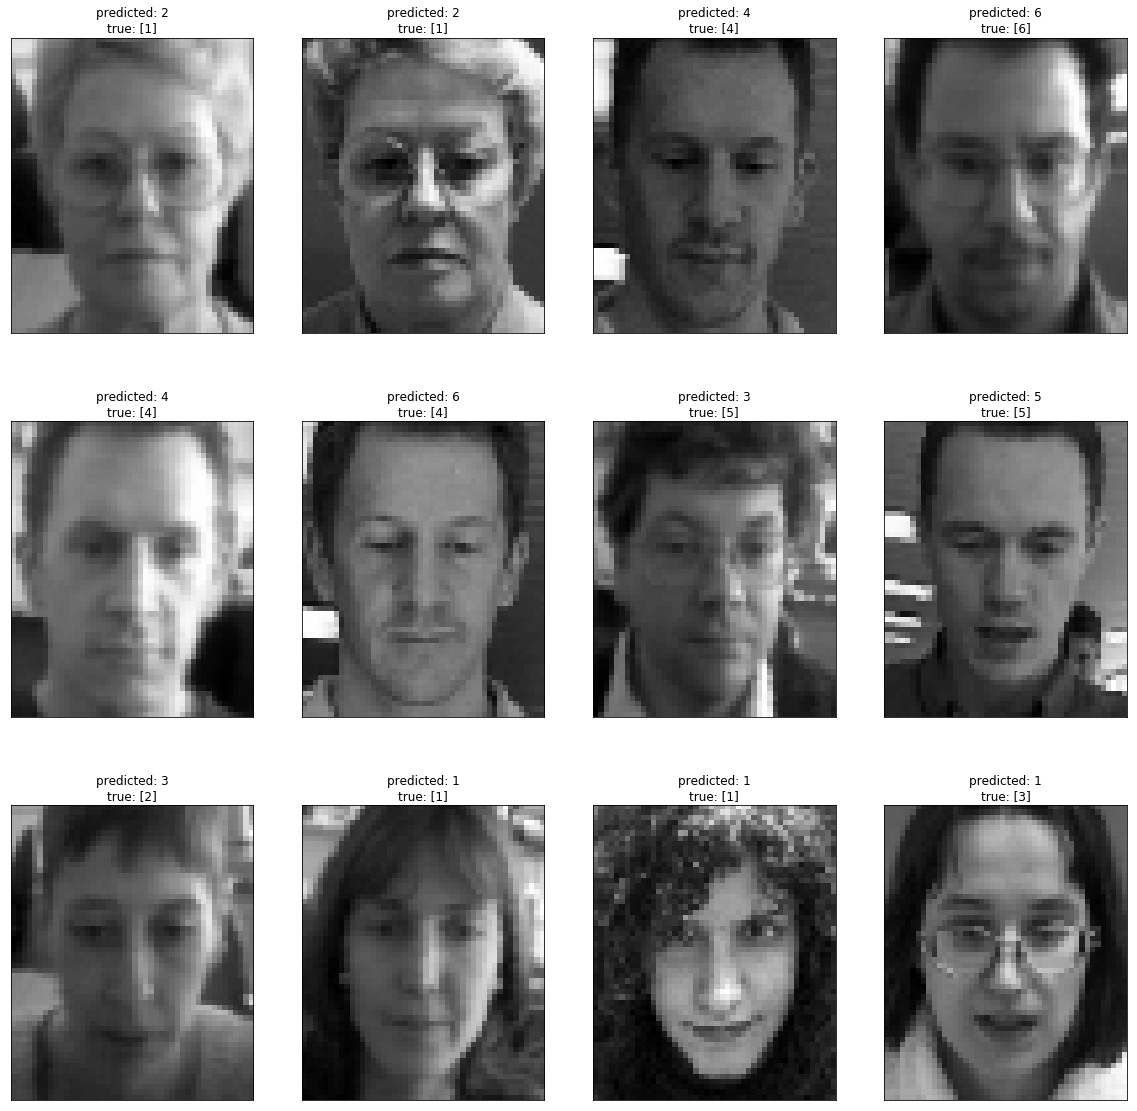

In [32]:
%%timeit
%%memit
pca = PCA(n_components=xposbest, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf = clf.fit(X_train_pca, y_train.ravel())


y_pred = clf.predict(X_test_pca)


results_error = y_pred - y_test.ravel()
success_rate = np.count_nonzero(results_error == 0) / len(y_test)

end_time = time.time()
run_time = end_time - start_time
times.append(run_time)

accuracies.append(success_rate)

print('At '+str(xposbest)+' Eigenvalues: ' + str(success_rate) +'% ' + 'Algo = ' + str(weights))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

mem_usage = memory_usage(-1, max_usage = True)
mems.append(mem_usage)

print(str(mem_usage) + ' MB')
print(str(run_time) + ' s')
print(str(success_rate) + ' %')

prediction_titles = list(titles(y_pred, y_test, face_l))
plot_gallery(X_test, prediction_titles, 46, 56)


In [92]:
from sklearn import preprocessing

In [372]:
%%timeit
M_AM = 10

def eigspace_generator(data):
    num_train = len(data[0])
    avg_face = (data.mean(axis=1)) / num_train
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    print(A.shape)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    #print(len(eigvals_low_dim))
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e+3]
    print(len(nonzero_eigvals_low_dim))
    #print(data)
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e+3]
    
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_AM]]) 
    print(eigfaces_low_dim_unnormalized.shape)
    # Choose all the eigenvectors as eigenfaces in low_dim this case, since the maximum number of eigenfaces would
    # not exceed 10
    
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    print(eigfaces_low_dim.shape)
    list_eig_space.append(eigfaces_low_dim)
    
    list_avg_face.append(avg_face)

    
num_people = face_l.max()
num_pix = face_x.shape[1]
eig_space = np.zeros((num_people,num_pix,M_AM))
sorted_train_data = X_train[y_train.ravel().argsort()]

list_eig_space = [] # Each element of list_eig_space contains the eigenspace of the i+1th person
list_avg_face = [] # Each element of list_avg_face contains the average face of the i+1th person
list_projection = [] # Each element of list_projection contains the projection of the jth test data to different eigenspaces
test_results_AM = []

# Generate all eigenspaces
column = 0
for i in range(1,num_people+1):
    num_faces = y_train.ravel().tolist().count(i)
    eigspace_generator(sorted_train_data.T[:,column : column + num_faces])
    column += num_faces

    
# Project each test data onto each eigenspace
for j in range(len(X_test.T[0])): 
    error = [];
    for i in range(len(list_eig_space)): 
        w = (X_test[j].T).dot(list_eig_space[i]) # row vector containing projection
        reconstructed_data = np.asarray(list_avg_face[i]).reshape(num_pix,1).ravel() + list_eig_space[i].dot(w.T) 
        error.append(np.linalg.norm(X_test[j] - reconstructed_data))
    test_results_AM.append(np.argmin(error))
    print (test_results_AM)


(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 5)
5
(2576, 5)
(2576, 5)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 5)
5
(2576, 5)
(2576, 5)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 10)
10
(2576,

(2576, 6)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
[9]
[9, 30

[9, 30, 4, 25]
[9, 30, 4, 25, 35]
[9, 30, 4, 25, 35, 19]
[9, 30, 4, 25, 35, 19, 35]
[9, 30, 4, 25, 35, 19, 35, 18]
[9, 30, 4, 25, 35, 19, 35, 18, 15]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35,

(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
[9]
[9, 30]
[9, 30, 4]
[9, 30, 4, 25]
[9, 30, 4, 25, 35]
[9, 30, 4, 25, 35, 19]
[9, 30, 4, 25, 35, 19, 35]
[9, 30, 4, 25, 35, 19, 35, 18]
[9, 30, 4, 25, 35, 19, 35, 18, 15]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 3

[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9, 16, 38]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 2

[9, 30, 4]
[9, 30, 4, 25]
[9, 30, 4, 25, 35]
[9, 30, 4, 25, 35, 19]
[9, 30, 4, 25, 35, 19, 35]
[9, 30, 4, 25, 35, 19, 35, 18]
[9, 30, 4, 25, 35, 19, 35, 18, 15]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 

[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9, 16, 38, 16, 43, 43, 29, 50, 25, 38, 2, 20, 36, 27, 1, 9, 22, 22, 35, 16, 47, 50, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9, 16, 38, 16, 43, 43, 29, 50, 25, 38, 2, 20, 36, 27, 1, 9, 22, 22, 35, 16, 47, 50, 26, 18]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9

[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16

(2576, 8)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 10)
10
(2576, 10)
(2576, 10)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 6)
6
(2576, 6)
(2576, 6)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 8)
8
(2576, 8)
(2576, 8)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
(2576, 9)
9
(2576, 9)
(2576, 9)
(2576, 7)
7
(2576, 7)
(2576, 7)
[9]
[9, 30]
[9, 30, 4]
[9, 30, 4, 25]
[9, 30, 4, 25, 35]
[9, 30, 4, 25, 35, 19]
[9, 30, 4, 25, 35, 19, 35]
[9, 30, 4, 25, 35, 19, 35, 18]
[9, 30, 4, 25, 35, 19, 35, 18, 15]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35]
[9, 30, 4, 25, 35, 19, 35, 18,

[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 22, 30, 26, 1, 37, 25, 22, 36, 4, 50, 14, 12, 35, 9, 12, 6, 36, 20, 4, 29, 26, 26, 1, 35, 16, 4, 14, 5, 1, 9, 30, 9, 16, 38]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16, 26, 47, 16, 29, 19, 24, 16, 47, 3, 37, 1, 49, 18, 4, 20, 48, 29, 5, 26, 19, 2

[9, 30, 4, 25]
[9, 30, 4, 25, 35]
[9, 30, 4, 25, 35, 19]
[9, 30, 4, 25, 35, 19, 35]
[9, 30, 4, 25, 35, 19, 35, 18]
[9, 30, 4, 25, 35, 19, 35, 18, 15]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35, 35, 26, 2, 20, 4, 4, 2, 16, 16]
[9, 30, 4, 25, 35, 19, 35, 18, 15, 41, 26, 12, 35,

52

In [308]:
list_eig_space

[array([[0.02723672],
        [0.026663  ],
        [0.02299665],
        ...,
        [0.01381516],
        [0.01296143],
        [0.01263833]]), array([[0.02968982],
        [0.03062875],
        [0.03000703],
        ...,
        [0.01097335],
        [0.01109298],
        [0.0123331 ]]), array([[0.02081104],
        [0.02091301],
        [0.02183518],
        ...,
        [0.01710126],
        [0.01815858],
        [0.02143086]]), array([[0.02466969],
        [0.02309334],
        [0.02143585],
        ...,
        [0.01292343],
        [0.01259505],
        [0.01426299]]), array([[0.02783977],
        [0.02729002],
        [0.02710836],
        ...,
        [0.02196061],
        [0.02117146],
        [0.02050956]]), array([[0.02435131],
        [0.02436628],
        [0.02625009],
        ...,
        [0.01593429],
        [0.01583481],
        [0.0156499 ]]), array([[0.02831733],
        [0.02801342],
        [0.02756493],
        ...,
        [0.01423071],
        [0.01360532],
 

In [283]:
list_eig_space[i].shape

(2576, 1)

In [282]:
list_avg_face[i].shape

(2576,)

In [261]:
list_eig_space[i].dot(w.T).shape

(2576,)

In [265]:
(np.asarray(list_avg_face[i]).reshape(num_pix,1).ravel() + list_eig_space[i].dot(w.T)).shape

(2576,)

In [267]:
X_test[j].shape

(2576,)

In [255]:
(X_test[j] - reconstructed_data).shape

(2576, 2576)

In [336]:
results_error_AM = test_results_AM - y_test.ravel()

success_rate_AM = np.count_nonzero(results_error_AM == 0) / len(test_results_AM)
print(success_rate_AM)

cm_AM = confusion_matrix(y_test, test_results_AM)

print(cm_AM)
plt.matshow(cm_AM, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

TypeError: can only concatenate list (not "int") to list

In [337]:
results_error_AM

array([  0,  42, -30, -27,   1, -15,  -9, -22,   4,  38,  22, -10,  34,
         6,  12,  -4, -13, -48,  -5, -10,   9,   9,   1,  36, -34,  25,
       -31,   6, -24, -10, -12,  -8, -17,  17,  10, -39, -13,  20,   5,
       -21, -26, -24,   9,  21, -24, -38, -12, -10, -23,  34, -37,   9,
       -20,   6,   0,   1,  -6, -17,  15, -32,   3, -12,   8,  -7, -13,
        34, -23, -18,  -8, -21,  -7,  -3,   6, -13, -23,  27, -18,  22,
        -4,  25,   7, -23,  28,   7, -31,  28,   7, -37,  -1,  -3,  -3,
        -5, -26,  40,   9,  -6, -10,  25,  31,  25,  32,  32,   1,  25])

In [243]:
print(results_error_AM)

[ 24  22 -29 -32   2 -30   7 -24   5  31   0 -18  41   7  13  -2 -21 -37
  24  24  41  39  17  37  -5  33 -45  -9 -33   1  -2 -44   2  13  11 -19
   7 -22  -3  -2 -37   9  -9  -5 -26  -3 -11  -5 -16  29   7  10  -2  18
   1  19   9  14  15 -26  23 -24   1 -28  -4  34 -22 -31 -13  -2  -6  -2
  24 -13 -22  28  22 -17   4  33 -16 -22  38  36  -3  11   7  13  32  -2
  -2 -33 -21  41  10 -31 -13 -18  -2  17  14 -14 -34  33]


In [225]:
columns = 0
for i in range(1,num_people+1):
    num_faces = y_train.ravel().tolist().count(i)
    print(sorted_train_data.T[:,columns : columns + num_faces].shape)

(2576, 7)
(2576, 9)
(2576, 9)
(2576, 6)
(2576, 9)
(2576, 7)
(2576, 7)
(2576, 6)
(2576, 5)
(2576, 8)
(2576, 6)
(2576, 8)
(2576, 9)
(2576, 8)
(2576, 9)
(2576, 10)
(2576, 10)
(2576, 5)
(2576, 10)
(2576, 9)
(2576, 8)
(2576, 6)
(2576, 9)
(2576, 8)
(2576, 7)
(2576, 8)
(2576, 10)
(2576, 8)
(2576, 8)
(2576, 10)
(2576, 10)
(2576, 8)
(2576, 7)
(2576, 6)
(2576, 8)
(2576, 10)
(2576, 10)
(2576, 9)
(2576, 7)
(2576, 7)
(2576, 6)
(2576, 9)
(2576, 7)
(2576, 9)
(2576, 8)
(2576, 8)
(2576, 7)
(2576, 9)
(2576, 9)
(2576, 7)
(2576, 9)
(2576, 7)


In [217]:
num_people

52

In [210]:
sorted_train_data.shape

(416, 2576)

In [186]:
list_eig_space[0].T.shape

(1, 416)

In [198]:
X_test[j]

array([218, 222, 223, ...,  72, 157, 167], dtype=uint8)

In [195]:
j

0

In [162]:
len(list_eig_space)

52

In [140]:
len(list_eig_space)

52

In [137]:
X_train.shape

(416, 2576)

In [124]:
X_test[0]

array([218, 222, 223, ...,  72, 157, 167], dtype=uint8)

In [110]:
y_train.ravel()

array([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22,
       22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28,
       29, 29, 29, 29, 29

In [99]:
sorted_train_data[:,column : column + num_faces]

array([], shape=(416, 0), dtype=uint8)

In [119]:
y_train.ravel().tolist().count(1)

7

In [73]:
X_train[y_train.argsort()]

array([[[91, 79, 82, ..., 66, 25, 21]],

       [[91, 79, 82, ..., 66, 25, 21]],

       [[91, 79, 82, ..., 66, 25, 21]],

       ...,

       [[91, 79, 82, ..., 66, 25, 21]],

       [[91, 79, 82, ..., 66, 25, 21]],

       [[91, 79, 82, ..., 66, 25, 21]]], dtype=uint8)

In [89]:
X_train[y_train.ravel().argsort()]


array([[ 91,  79,  82, ...,  66,  25,  21],
       [128, 129, 133, ...,  15,  17,  14],
       [107, 100,  61, ..., 122, 120, 113],
       ...,
       [227, 232, 235, ...,  43,  45,  46],
       [ 70,  68,  63, ..., 132, 125, 124],
       [146, 160, 140, ...,  64,  61,  58]], dtype=uint8)

In [53]:
%mprof run test.py
%mprof plot

UsageError: Line magic function `%mprof` not found.


In [46]:
%load_ext memory_profiler
%mprof run bestcase
%mprof plot

UsageError: Line magic function `%mprof` not found.


In [47]:
import memory_profiler

In [50]:
%%memit

UsageError: %%memit is a cell magic, but the cell body is empty. Did you mean the line magic %memit (single %)?


In [171]:
times_ms = []
for itime in times:
    times_ms.append(itime * 1000) 

In [136]:
times_ms

[40.4210090637207,
 33.30731391906738,
 43.0598258972168,
 30.19094467163086,
 30.95698356628418,
 27.57406234741211,
 36.047935485839844,
 43.04909706115723,
 37.90402412414551,
 33.1878662109375,
 32.92226791381836,
 35.28618812561035,
 40.495872497558594,
 34.55305099487305,
 38.236141204833984,
 37.93215751647949,
 33.88214111328125,
 39.66689109802246,
 49.73316192626953,
 51.43117904663086,
 53.17401885986328,
 48.49982261657715,
 55.72509765625,
 62.5157356262207,
 50.7969856262207,
 39.769649505615234,
 39.73197937011719,
 47.03211784362793,
 54.3522834777832,
 42.365074157714844,
 45.93825340270996,
 50.788164138793945,
 51.203012466430664,
 56.224822998046875,
 65.02795219421387,
 65.98877906799316,
 66.62297248840332,
 58.95185470581055,
 45.85695266723633,
 48.532962799072266,
 57.81292915344238,
 46.356916427612305,
 42.40107536315918,
 37.042856216430664,
 37.815093994140625,
 36.39984130859375,
 47.055959701538086,
 72.88885116577148,
 45.42708396911621,
 37.629127502441

In [132]:
times[1]

0.03330731391906738

In [108]:
xpos

46

In [77]:

results_error = y_pred - y_test.ravel()
success_rate = np.count_nonzero(results_error == 0) / len(y_test)



In [78]:
success_rate

0.49038461538461536

In [361]:
y_train

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [11],
       [11],
       [11],
       [11],

In [362]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
face_id = mat_content['l']

print(face_data)
print(face_data.shape)

print(face_id)
print(face_id.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

In [ ]:
from sklearn.preprocessing import 